In [33]:
!pip install findspark

In [34]:
!pip install pyspark

In [35]:
import traceback
import findspark
import os
import sys
#import libraries
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import subprocess
from pyspark.sql.functions import *
from functools import reduce
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import DoubleType
from pyspark.ml import Pipeline

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("PySpark Craigslist") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

sc = spark.sparkContext

In [38]:
vehicle_listings = spark.read.format("csv").option("header", "true").load("/content/drive/MyDrive/unzipped_dbms/used_cars_data.csv")
type(vehicle_listings)

pyspark.sql.dataframe.DataFrame

In [10]:
vehicle_listings.show()

+-----------------+------------+----+----------+----------+---------------+-----+--------+-----------------+--------------------+------------+----------+--------------------+----------------+-------------------+-----------+--------------------+-----+-------------+----------------+--------------+-------------+----------------+---------+-------------+-------+--------------------+----------+--------------------+-----+------------+------+------+---------+--------+--------+-----------+-------------+----------+---------+--------------------+--------------------+----------+---------------+-------+------------------+-----------+------------------+-------+-------+--------------+-------------+------+-------------------+-----------+--------------------+------------+--------------------+------+--------------------+-----------------------+------------+--------------------+---------+-------+----+
|              vin|back_legroom| bed|bed_height|bed_length|      body_type|cabin|    city|city_fuel_econ

In [11]:
print(vehicle_listings.columns)

['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length', 'listed_date', 'listing_color', 'listing_id', 'longitude', 'main_picture_url', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'vehicle_damage_category', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year']


In [12]:
print(vehicle_listings.count(),len(vehicle_listings.columns))

3000507 66


In [39]:
vehicle_listings_clean=vehicle_listings.drop_duplicates(['vin', 'back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_certified', 'is_cpo', 'is_new', 'is_oemcpo', 'latitude', 'length', 'listed_date', 'listing_color', 'listing_id', 'longitude', 'main_picture_url', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'owner_count', 'power', 'price', 'salvage', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'theft_title', 'torque', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'vehicle_damage_category', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year'])

In [40]:
df=vehicle_listings_clean.select("vin","body_type","city","daysonmarket","engine_cylinders","exterior_color","franchise_dealer","franchise_make",
"front_legroom","fuel_tank_volume","fuel_type","has_accidents","city_fuel_economy","highway_fuel_economy","isCab","is_new","length","make_name",
"maximum_seating","mileage","model_name","price","seller_rating","width","horsepower","height","transmission_display")

In [41]:
cars=df.na.fill({'body_type':'Sedan','city':'all','daysonmarket':220,'engine_cylinders':'unknown','exterior_color':'unknown','franchise_dealer':False,'franchise_make':'unknown','front_legroom':39,'fuel_tank_volume': 13.2,'fuel_type':'unknown','has_accidents':False,'city_fuel_economy':15,'highway_fuel_economy':12,'isCab':False,'is_new':False,'length':230,'make_name':'unknown','maximum_seating':5,'mileage':0,'model_name':'unknown','price':'negotiable','seller_rating':2,'width':73.2,'horsepower':145.0,'height':61})


In [16]:
basic=["price","make_name","model_name","city","seller_rating"]

In [18]:
q1=cars.where("price<=100000 and city='Howell'").select(basic).orderBy(desc("seller_rating")).show(10)

+-------+---------+------------------+------+-------------+
|  price|make_name|        model_name|  city|seller_rating|
+-------+---------+------------------+------+-------------+
|13995.0|     Ford|            Fusion|Howell|          5.0|
|54900.0|     Ford|  F-350 Super Duty|Howell|          5.0|
|25900.0| Chrysler|          Pacifica|Howell|          5.0|
|20900.0|     Jeep|Wrangler Unlimited|Howell|          5.0|
|26900.0|     Ford|          Explorer|Howell|          5.0|
|69900.0|    Dodge|           Charger|Howell|          5.0|
|15900.0|   Nissan|            Maxima|Howell|          5.0|
|20900.0|      GMC|           Terrain|Howell|          5.0|
|20988.0|     Ford|     Fusion Hybrid|Howell|          5.0|
|30900.0|     Jeep|Wrangler Unlimited|Howell|          5.0|
+-------+---------+------------------+------+-------------+
only showing top 10 rows



In [19]:
q2=cars.where("make_name='BMW'or make_name='Ford'").select("make_name","model_name","body_type","is_new","price","seller_rating").show(20)

+---------+----------------+---------------+------+-------+------------------+
|make_name|      model_name|      body_type|is_new|  price|     seller_rating|
+---------+----------------+---------------+------+-------+------------------+
|      BMW|        5 Series|          Sedan| False|38995.0|3.3461538461538463|
|      BMW|              X4|SUV / Crossover| False|23900.0|4.4186046511627906|
|      BMW|              X3|SUV / Crossover| False|24995.0|             4.125|
|     Ford|          Fusion|          Sedan| False|13995.0|               5.0|
|     Ford|F-350 Super Duty|   Pickup Truck| False|54900.0|               5.0|
|     Ford|          Fusion|          Sedan|  True|25295.0|               4.5|
|      BMW|        3 Series|          Sedan| False|44250.0| 4.161290322580645|
|      BMW|        3 Series|          Sedan| False|25795.0| 4.161290322580645|
|     Ford|  Focus Electric|      Hatchback| False|12995.0| 4.237333333333333|
|     Ford|        Explorer|SUV / Crossover| False|2

In [20]:
q3=cars.select("body_type").distinct().show(5)

+------------+
|   body_type|
+------------+
|   Hatchback|
| Convertible|
|       Sedan|
|Pickup Truck|
|       Wagon|
+------------+
only showing top 5 rows



In [21]:
q3=cars.filter("make_name='Ford'").select("model_name").distinct().show(10)

+--------------------+
|          model_name|
+--------------------+
|            E-Series|
|     Transit Connect|
|                Flex|
|               Focus|
|       Fusion Energi|
|               F-150|
|F-350 Super Duty ...|
|              Fusion|
|Mustang Shelby GT350|
|     Explorer Hybrid|
+--------------------+
only showing top 10 rows



In [42]:
q4=cars.filter("transmission_display='Automatic' and seller_rating=5.0").select("make_name","model_name","body_type","transmission_display","horsepower","price","seller_rating").sort(desc("seller_rating")).show()

+---------+------------------+---------------+--------------------+----------+-------+-------------+
|make_name|        model_name|      body_type|transmission_display|horsepower|  price|seller_rating|
+---------+------------------+---------------+--------------------+----------+-------+-------------+
|     Ford|            Fusion|          Sedan|           Automatic|     245.0|13995.0|          5.0|
|     Ford|  F-350 Super Duty|   Pickup Truck|           Automatic|     440.0|54900.0|          5.0|
|Chevrolet|            Camaro|          Coupe|           Automatic|     650.0|51988.0|          5.0|
| Chrysler|          Pacifica|        Minivan|           Automatic|     287.0|25900.0|          5.0|
|      BMW|          5 Series|          Sedan|           Automatic|     248.0|27995.0|          5.0|
|     Ford|          EcoSport|SUV / Crossover|           Automatic|     166.0|24512.0|          5.0|
|     Jeep|           Compass|SUV / Crossover|           Automatic|     180.0|21288.0|     

In [22]:
q5=cars.filter("make_name='BMW' and model_name='X3'").select(basic).orderBy(desc("seller_rating")).show(10)

+-------+---------+----------+-----------+-------------+
|  price|make_name|model_name|       city|seller_rating|
+-------+---------+----------+-----------+-------------+
|23900.0|      BMW|        X3|   Brockton|          5.0|
|52745.0|      BMW|        X3| South Bend|          5.0|
|11900.0|      BMW|        X3|  Salisbury|          5.0|
|12900.0|      BMW|        X3|New Windsor|          5.0|
|11900.0|      BMW|        X3|Londonderry|          5.0|
|25900.0|      BMW|        X3|   Hooksett|          5.0|
|50235.0|      BMW|        X3| South Bend|          5.0|
|11995.0|      BMW|        X3| Bloomfield|          5.0|
|14500.0|      BMW|        X3|    Methuen|          5.0|
| 6950.0|      BMW|        X3|   Coventry|          5.0|
+-------+---------+----------+-----------+-------------+
only showing top 10 rows



In [43]:
q6=cars.filter("make_name='Ford' and model_name='Fusion'").select("price","make_name","model_name","city","seller_rating","daysonmarket").orderBy(asc("daysonmarket")).show(10)

+-------+---------+----------+----------------+------------------+------------+
|  price|make_name|model_name|            city|     seller_rating|daysonmarket|
+-------+---------+----------+----------------+------------------+------------+
|30935.0|     Ford|    Fusion|       Amsterdam|              3.75|           0|
|17995.0|     Ford|    Fusion|   Wall Township| 4.666666666666667|           0|
|22999.0|     Ford|    Fusion|      Portsmouth| 4.428571428571429|           0|
| 6900.0|     Ford|    Fusion|North Chelmsford|               5.0|           0|
|12999.0|     Ford|    Fusion| North Attleboro|                 2|           0|
|16990.0|     Ford|    Fusion|        Freeport|2.8771929824561404|           0|
|11795.0|     Ford|    Fusion|           Alton|               4.6|           0|
|12650.0|     Ford|    Fusion|             Bow| 4.611111111111111|           0|
| 7495.0|     Ford|    Fusion|         Sheldon| 4.666666666666667|           0|
|27669.0|     Ford|    Fusion|     Fowle

data visuvalization

In [24]:
df_heat=cars.sample(False,0.0001,63).toPandas()

In [25]:
df_heat.head(2)

,vin,body_type,city,daysonmarket,engine_cylinders,exterior_color,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,city_fuel_economy,highway_fuel_economy,isCab,is_new,length,make_name,maximum_seating,mileage,model_name,price,seller_rating,width,horsepower,height,transmission_display
0,1FM5K8D83JGA45727,SUV / Crossover,Little Rock,16,V6,Ingot Silver Metallic,True,Nissan,42.9 in,18.6 gal,Gasoline,True,16.0,22.0,True,False,198.3 in,Ford,7 seats,55532.0,Explorer,28800.0,4.105263157894737,90.2 in,290.0,71 in,Automatic
1,JTEBU5JR3J5583039,SUV / Crossover,Show Low,1,V6,Nautical Blue Metallic,True,Chevrolet,41.7 in,23 gal,Gasoline,False,17.0,20.0,False,False,190.2 in,Toyota,7 seats,43825.0,4Runner,34000.0,3.6,75.8 in,270.0,71.5 in,Automatic


In [26]:
df_heat['daysonmarket']= pd.to_numeric(df_heat['daysonmarket'])

In [27]:
df_heat['city_fuel_economy']= pd.to_numeric(df_heat['city_fuel_economy'])

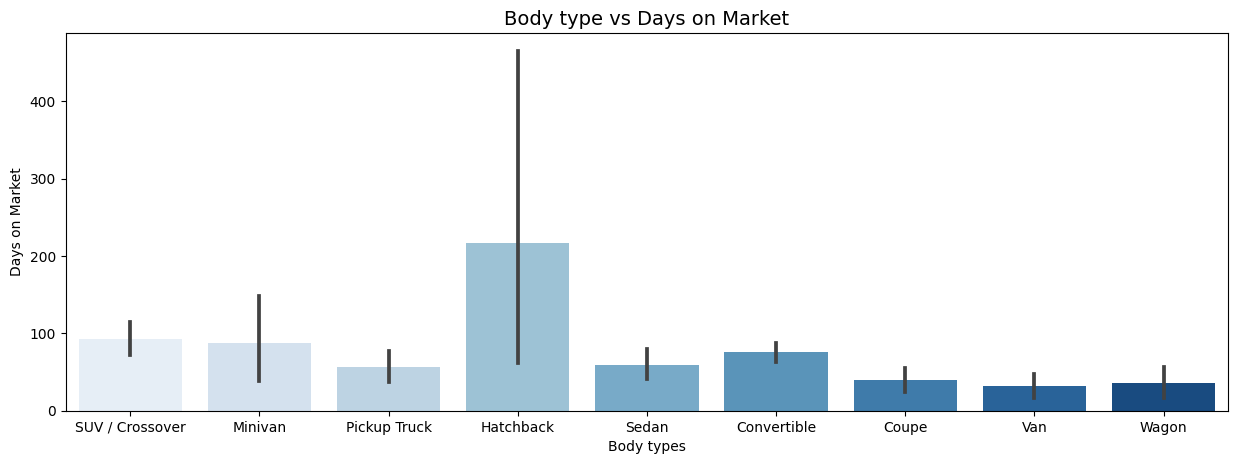

In [45]:
import seaborn as sns
plt.figure(figsize=(15,5), dpi=100) 
sns.barplot(x = 'body_type',y = 'daysonmarket',data = df_heat,palette = "Blues")
plt.title('Body type vs Days on Market', fontsize = 14)
plt.xlabel('Body types')
plt.ylabel('Days on Market')
plt.show()

In [29]:
print(df_heat['make_name'].value_counts())

Ford                    25
Chevrolet               18
Toyota                  16
Honda                   16
Nissan                  12
                        ..
Keyless Entry            1
4-Wheel Disc Brakes      1
Illuminated entry        1
Leather Shift Knob       1
Remote keyless entry     1
Name: make_name, Length: 128, dtype: int64


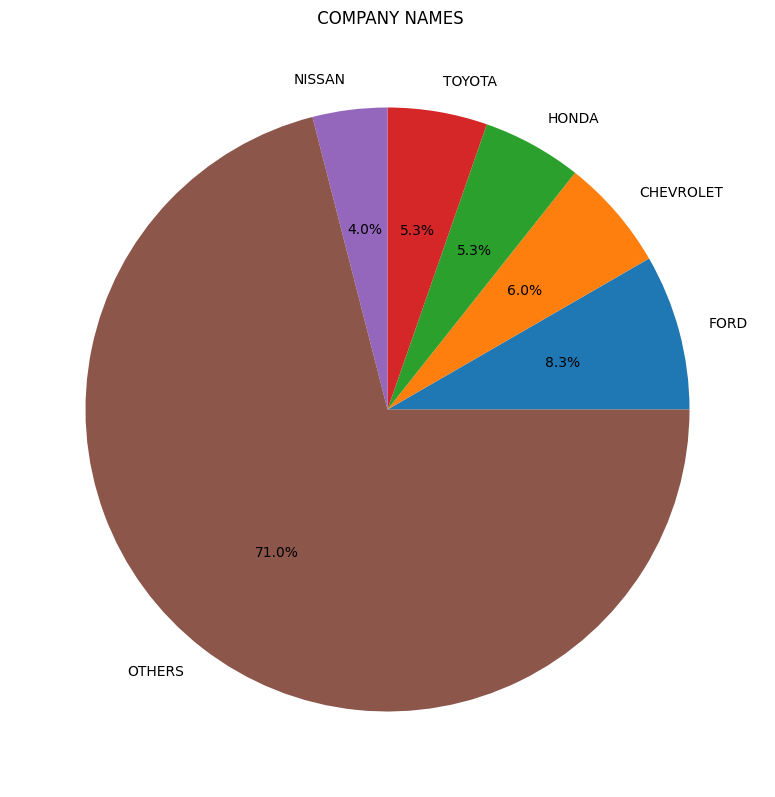

In [49]:
cars = ['FORD', 'CHEVROLET', 'HONDA',
        'TOYOTA', 'NISSAN', 'OTHERS']
data = [25, 18, 16, 16, 12, 213]
plt.figure(figsize=(15,10), dpi=100)
plt.pie(data, labels = cars,autopct='%1.1f%%')

plt.title(' COMPANY NAMES')

plt.show()

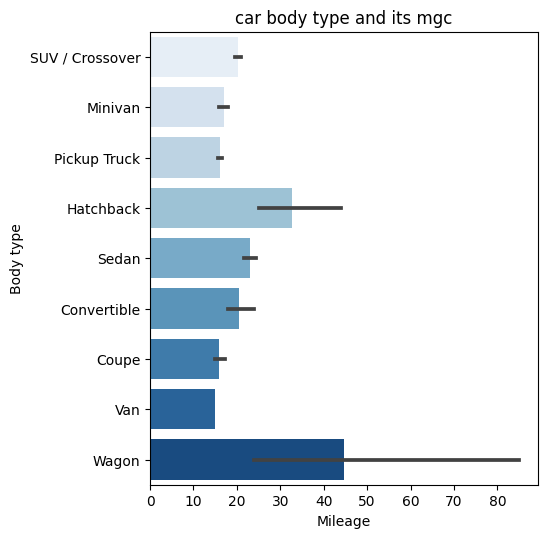

In [64]:
import seaborn as sns
plt.figure(figsize=(5,6), dpi=100) 
sns.barplot(x ='city_fuel_economy',y='body_type',data = df_heat,palette = "Blues")
plt.title('car body type and its mgc')
plt.xlabel('Mileage')
plt.ylabel('Body type')

plt.show()